In [4]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [6]:
from sklearn import linear_model
from sklearn.datasets import load_iris

# Read Data (Iris)

In [7]:
iris = load_iris()
X = iris.data
Y = iris.target

In [8]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

# Analyze Data

In [9]:
iris_data = DataFrame(X, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
iris_target = DataFrame(Y, columns=['Species'])

In [10]:
def species(n):
    if n==0:
        return 'Setosa'
    if n==1:
        return 'Versicolour'
    if n==2:
        return 'Virginica' 

In [11]:
iris_target['Species'] = iris_target['Species'].apply(species)

In [12]:
iris = pd.concat([iris_data, iris_target], axis=1)

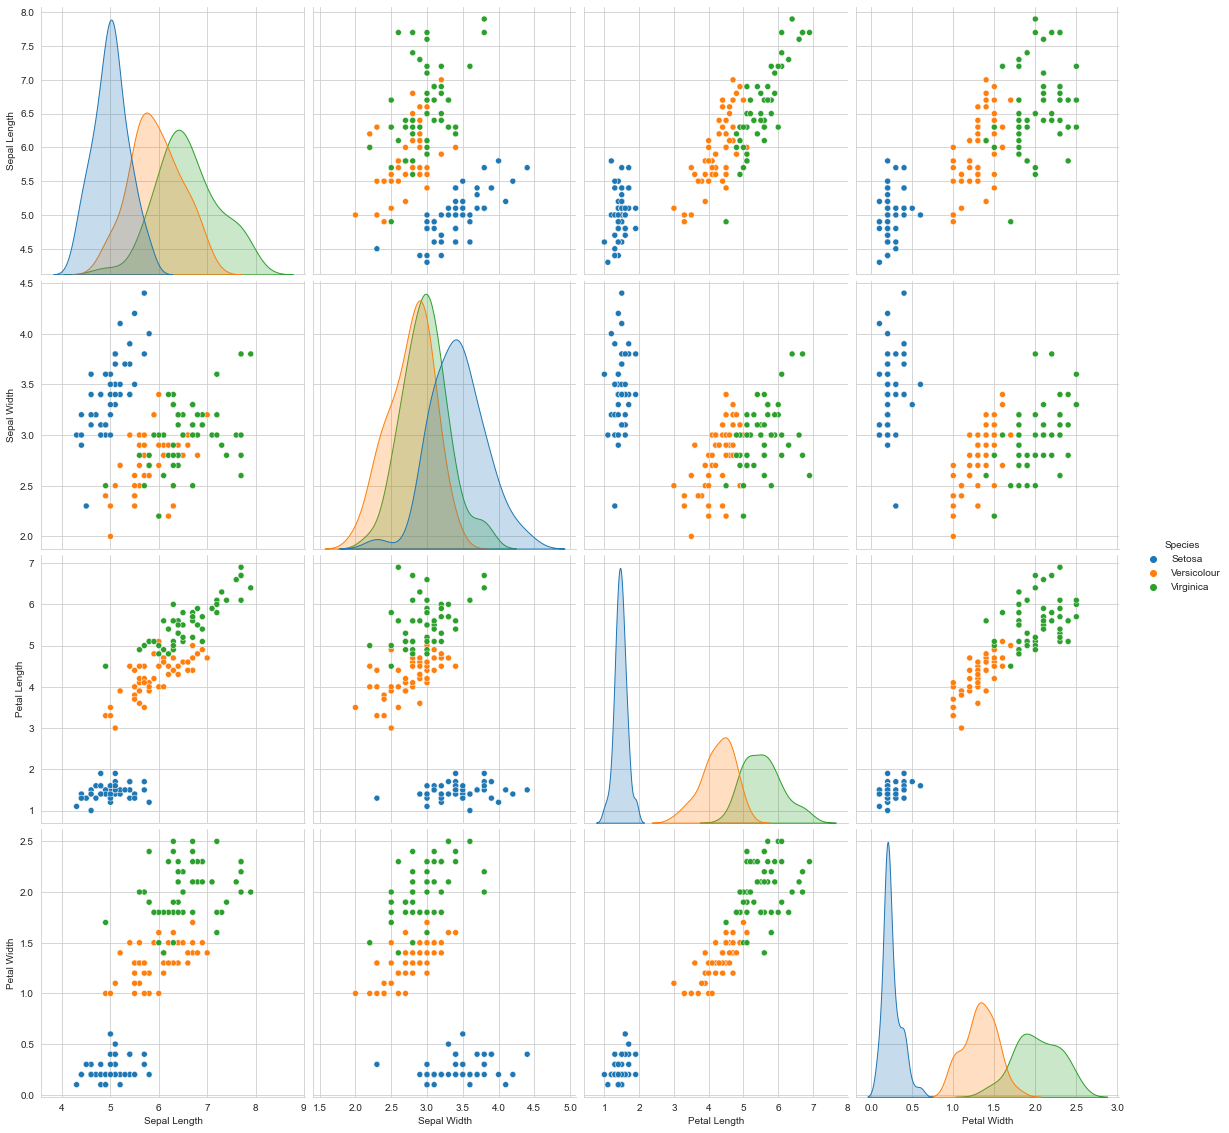

In [13]:
sns.pairplot(iris, hue='Species', height=4)

# Data Wrangling

In [15]:
iris.isnull()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


# Testing & Training Data

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.4, random_state=3)

In [18]:
logreg=LogisticRegression()

In [19]:
logreg.fit(X_train,Y_train)

LogisticRegression()

In [20]:
from sklearn import metrics

Y_pred = logreg.predict(X_test)

print(Y_pred)

[0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 1 2 2 0 2 2 2 1 0 2 2 1 1 1 0 0 2 1 0 0 2
 0 2 1 2 1 0 0 2 1 0 2 2 1 0 0 2 1 1 0 2 0 2 1]


In [21]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      0.90      0.95        20
           2       0.90      1.00      0.95        18

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.96        60
weighted avg       0.97      0.97      0.97        60



In [22]:
print(metrics.accuracy_score(Y_test, Y_pred))

0.9666666666666667
